## Final Project Submission

Please fill out:
* Student name: Maria Kuzmin
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: tbd


## Don't Roam Buy a Home

The real estate startup “Don’t Roam Buy a Home” (DRBH for short) has contacted us as they are trying to create an app targeted at those who do not feel like they can compete in the current brutal real estate market. DRBH’s application is meant for the normal average person that does not have much knowledge about the real estate market but is trying to understand what would be the best investment given their resources and their needs.

In our business case, DRBH has hired us in order to assist with analyzing raw real estate data and breaking down the trends of the housing market in King County. Their end product centers around having users enter the desired number of bedrooms, bathrooms, the overall residence’s square feet or lot size as well as neighborhood, budget in terms of savings and possible monthly mortgage. With this information the app will provide the user key information to help make the most educated choice and have the most profitable investment with the available funds.

Don't Roam Buy a Home will help users answer some questions like: 
- what is the best neighborhood for me to look into buying a house, given my budget and monthly salary?
- Can I afford an extra bedroom/bathroom or should I save up and add one later on?
- Would it be better to buy a new property or an old run down one and use the extra money to renovate?
- Is this a a good time to buy, given my budget and my salary, or to wait to purchase a house, saving up my monthly salary for a bigger down payment?

These and more are the information that we will be able to provide to the users of the app, starting from our analysis of the King's County Housing Market.

## Looking at the data first

Let's import all the libraries that we are going to need for our analysis.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss # these last 3 for cool graphs, not essential
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.preprocessing import LabelBinarizer

%matplotlib inline

The data is provided in the file 

### The Data
This project uses the King County House Sales dataset, which can be found in `kc_house_data.csv` in the data folder in this assignment's GitHub repository. The description of the column names can be found in `column_names.md` in the same folder. As with most real world data sets, the column names are not perfectly described, so you'll have to do some research or use your best judgment if you have questions about what the data means.

It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you ignore some or all of the following features:

date
view
sqft_above
sqft_basement
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15

### **Column Names and Descriptions for King County Data Set**

- `id` - Unique identifier for a house
- `date` - Date house was sold
- `price` - Sale price (prediction target)
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms
- `sqft_living` - Square footage of living space in the home
- `sqft_lot` - Square footage of the lot
- `floors` - Number of floors (levels) in house
- `waterfront` - Whether the house is on a waterfront
    - Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
- `view` - Quality of view from house
    - Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
- `condition` - How good the overall condition of the house is. Related to maintenance of house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
- `grade` - Overall grade of the house. Related to the construction and design of the house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
- `sqft_above` - Square footage of house apart from basement
- `sqft_basement` - Square footage of the basement
- `yr_built` - Year when house was built
- `yr_renovated` - Year when house was renovated
- `zipcode` - ZIP Code used by the United States Postal Service
- `lat` - Latitude coordinate
- `long` - Longitude coordinate
- `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df=pd.read_csv('Data/kc_house_data.csv')

In [125]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

ID is a unique identifier therefore not really relevant to our analysis.
Also waterfront and view have very few entries that are not NaN, so I would drop those three columns before running an analysis on the data. Year renovated also has a few entries but I think the information it carries can be very interesting so we are going to keep it for now.
I'll drop also latitude and longitude. In terms of the area for now I am just interested in the zipcode and I will dig later into that. But for now I just want the most relevant variables.

In [8]:
df.drop(['id', 'waterfront', 'view', 'lat', 'long', 'zipcode'], axis=1, inplace=True)

What we are interested in in our model is if we can predict the price based on the information we have. So we are going to set y as the price, and X as all the other variables we have and we are going to fit and run a model.

First I need to do one hot encoding before being able to fit a model.
But I guess before that I could do a heatmap and the all graph thingy.

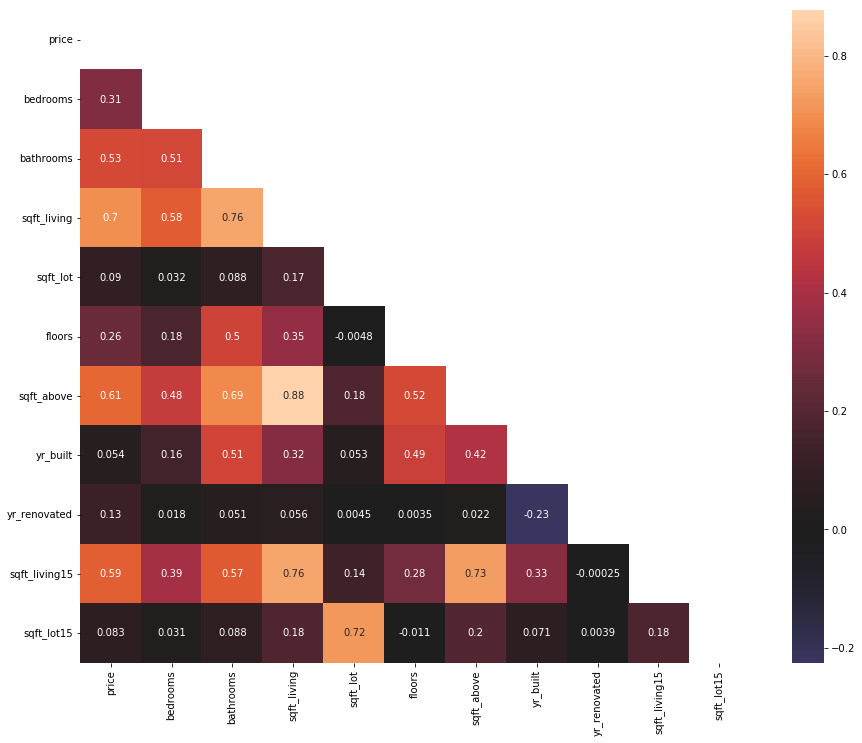

In [9]:
#heat map
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), center=0, ax=ax, annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)),);

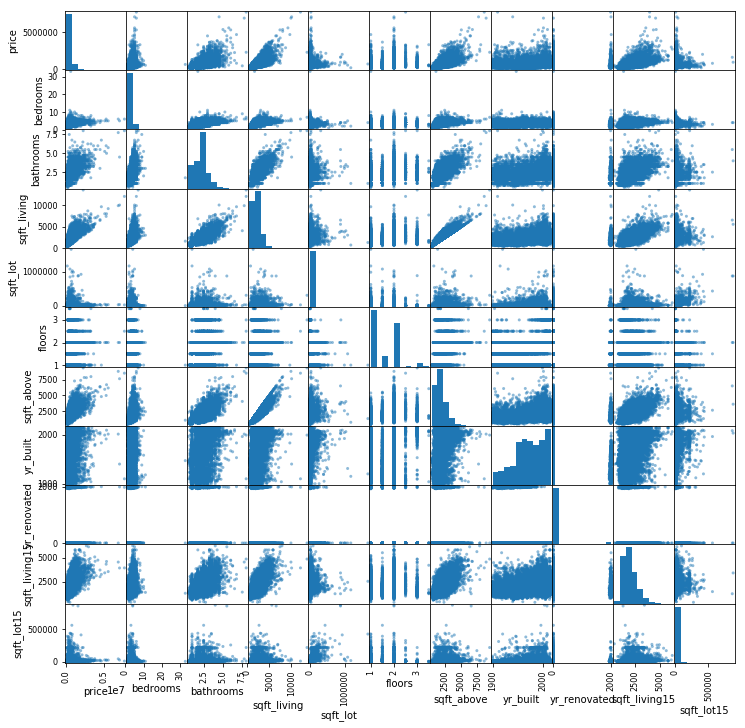

In [10]:
pd.plotting.scatter_matrix(df,figsize  = [12, 12]);
plt.show()

In [11]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,-0.000247,0.003852
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.731767,0.326377,-0.000247,1.000000,0.183515


There are some interesting correlations here.
As we expected especially for number of bedrooms, bathrooms, living sqfootage and sqft above.
Interestingly enough there is also a correlation with the sqft of the houses nearby.
To better understand/explore these correlations we are going to do some data preparation, using one hot encoding and then running a linear regression model and then we will proceed to try to improve our model getting rid of outliers and studying the correlation coefficients. And we will see if that improves our model.

## Clean the data
### Change formats
Some of the data is in the format 'object' and therefore cannot be included in the calculations. In one case, basement sqft it is probably a matter of just changing the format, while other entries like condition and grade are categorical values that need to be translated into something that our model can work with.
This is why we are going to use the method "One Hot Encoding" to change the format of these variables to be able to include them in our calculation. 

In [56]:
df=pd.read_csv('Data/kc_house_data.csv')

In [57]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
516.0         1
283.0         1
1960.0        1
1284.0        1
861.0         1
Name: sqft_basement, Length: 304, dtype: int64

Clearly most of the values are numerical, and can be easily turned into a numerical format, while we are going to change the value '?' into zero, as we are not aware of what is the square footage of the basement, it is safer to do this compared to assuming some other value for it.

In [58]:
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')

In [59]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [60]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Some other columns are actually numerical but need to be converted into that. Like "grade" has actually a number representing it but because it is followed also by a string its format is object.
Let us take care of that.

In [62]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [63]:
# Create a dictionary using which we
# will remap the values
dict = {'7 Average' : 7,'8 Good': 8,'9 Better':9,'6 Low Average':6,'10 Very Good':10,'11 Excellent':11,'5 Fair':5,\
        '12 Luxury':12,'4 Low':4,'13 Mansion':13 ,'3 Poor':3}
 
# Remap the values of the dataframe
df=df.replace({"grade": dict})

In [64]:
df['grade'] = df['grade'].astype(float)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Now let us explore the column 'condition'. Maybe we can also replace that easily with numerical values

In [66]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

From the reference that has been given to us (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) it is clear that the values for condition are to be interepreted as follows:
Relative to age and grade. Coded 1-5.

1 = Poor

2 = Fair

3 = Average

4 = Good

5= Very Good

We will then translate those values in the same way

In [67]:
dict = {'Poor':1, 'Fair':2, 'Average': 3,'Good': 4,'Very Good':5}
 
# Remap the values of the dataframe
df=df.replace({"condition": dict})

In [68]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  float64
 6   sqft_lot       21596 non-null  float64
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  object 
 9   view           21533 non-null  object 
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  8316 non-null   float64
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

### Handling missing values

As we can see the columns that have missing values are 'waterfront', 'view' and 'year renovated'.
There are clear reasons for some values to be missing as not all of the houses have a waterfront or information about the view,
and not all the houses were renovated. We will use that information later and separately, but for now we are not going to include these variables in our model so there is not need to worry about them.

In [70]:
df['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [71]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Running a linear regression here before one hot encoding (not sure I will keep it but let's try)

In [102]:
y=df['price']
X=df.drop(['price', 'date', 'view', 'waterfront', 'yr_renovated'], axis=1)
#model = sm.OLS(y, X).fit()
#model.summary()

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [103]:
linreg.coef_

array([-9.54592156e-07, -4.66408101e+04,  4.74067772e+04,  1.25801811e+02,
        1.46182212e-01,  1.27043556e+04,  2.58073278e+04,  1.03206486e+05,
        6.11910092e+01,  5.49860781e+01, -3.06734189e+03, -4.84376852e+02,
        5.49977094e+05, -2.47112697e+05,  3.80648388e+01, -3.31506028e-01])

In [104]:
linreg.intercept_

-3561265.2262814706

In [105]:
metrics.r2_score(y,linreg.predict(X))

0.6609340329668749

## One Hot Encoding

One Hot Encoding is a method that allows us to transform categorical variables into numerical ones to be able to better include them in our model.
Some variables that are for sure categorical are the number of bedrooms and bathrooms and floors.
And we are also going to transform the information about when the house was renovated into a binary selection, whether the house was renovated or not.

In [106]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [107]:
#BETTER EXAMPLE OF ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['bedrooms', 'bathrooms', 'floors']

# Fit encoder on training set
ohe.fit(df[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
df_cat = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                           columns=new_cat_columns, index=df.index)

# Replace training columns with transformed versions
ohe_df = pd.concat([df.drop(cat_columns, axis=1), df_cat], axis=1)
ohe_df

,id,date,price,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,...,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,10/13/2014,221900.0,1180,5650,NaN,NONE,3,7.0,1180,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,2570,7242,NO,NONE,3,7.0,2170,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,770,10000,NO,NONE,3,6.0,770,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,1960,5000,NO,NONE,5,7.0,1050,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,1680,8080,NO,NONE,3,8.0,1680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,1530,1131,NO,NONE,3,8.0,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,6600060120,2/23/2015,400000.0,2310,5813,NO,NONE,3,8.0,2310,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,1020,1350,NO,NONE,3,7.0,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,1600,2388,NaN,NONE,3,8.0,1600,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   waterfront      19221 non-null  object 
 6   view            21534 non-null  object 
 7   condition       21597 non-null  int64  
 8   grade           21597 non-null  float64
 9   sqft_above      21597 non-null  int64  
 10  sqft_basement   21597 non-null  float64
 11  yr_built        21597 non-null  int64  
 12  yr_renovated    17755 non-null  float64
 13  zipcode         21597 non-null  int64  
 14  lat             21597 non-null  float64
 15  long            21597 non-null  float64
 16  sqft_living15   21597 non-null  int64  
 17  sqft_lot15      21597 non-null 

## First Linear Regression Model
We are ready now for our first linear regression model!
Let us run it, and we are going to keep all the possible variables, with only the essential exceptions.
We are going to be excluding only view and waterfront (which seem to describe a small part of the data anyway), date and zipcode which even though are numerical don't actually make sense for our model and don't help us in our prediction.
We will remove also the column about renovations simply because we will treat that separately later on to do a more in depth analysis about it.

y=df['price']
X=df.drop(['price', 'date', 'view', 'waterfront', 'yr_renovated'], axis=1)
#model = sm.OLS(y, X).fit()
#model.summary()

linreg = LinearRegression()
linreg.fit(X, y)

In [119]:
y=ohe_df['price']
X=ohe_df.drop(['price', 'date','view', 'waterfront','yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [128]:
X.columns

Index(['id', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bedrooms_33', 'bathrooms_0.5',
       'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5',
       'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5',
       'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5',
       'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5',
       'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0',
       'floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
      

In [120]:
linreg.coef_

array([-5.36248525e-07,  1.06693037e+02,  1.35748564e-01,  3.14998445e+04,
        1.06062649e+05,  4.32722770e+01,  5.47558378e+01, -2.59490617e+03,
       -5.07543884e+02,  5.37042514e+05, -2.08840126e+05,  5.86664374e+01,
       -4.14957402e-01,  1.68717027e+05,  1.43600071e+05,  1.00919696e+05,
        5.81036713e+04,  4.38533242e+04, -2.83108801e+04, -1.98471683e+05,
        1.63685601e+04, -1.67869177e+05, -1.91647291e+05, -1.44225321e+05,
        1.98949096e+05, -5.95176542e+05, -4.40985200e+05, -5.22117425e+05,
       -4.34264829e+05, -5.37610991e+05, -5.42747522e+05, -5.29768169e+05,
       -5.38876150e+05, -5.47528585e+05, -5.34386709e+05, -5.01304562e+05,
       -4.18962527e+05, -4.59121838e+05, -3.18308014e+05, -3.21092294e+05,
       -1.91871819e+05, -2.75596935e+05,  1.27033455e+05, -1.47498474e+04,
        8.87696939e+04,  4.34214139e+05,  3.24664778e+05,  8.55663307e+05,
        5.29525226e+05, -2.84304569e+05,  3.91372879e+05, -4.86121038e+05,
        4.07829061e+06,  

In [121]:
linreg.intercept_

3522541.8527685367

In [122]:
metrics.r2_score(y,linreg.predict(X))

0.6924192582691565

Before doing a train-test split and doing cross validation for our model, let's try to improve the model increasing the R squared and once we have the best one we will run the cross validation too.

## Trying to improve my model
We are going now to take several different steps to try to improve this first linear regression model.

### Transforming the variables, scaling and normalizing them
The easiest way to see this is by plotting histograms that can show us visually which variables are already pretty normalized and which ones would need a transformation and have havey outliers.

The columns on which I chose to focus so far are: bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, sqft_above, sqft_basement, yr_built, zipcode, lat, long, sqftliving_15 sqft_lot_15.
I will not explore zipcode, lat and long as given what they mean we don't expect them to be normally distributed.

In [134]:
cols=['sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'bedrooms', 'bathrooms', 'floors']

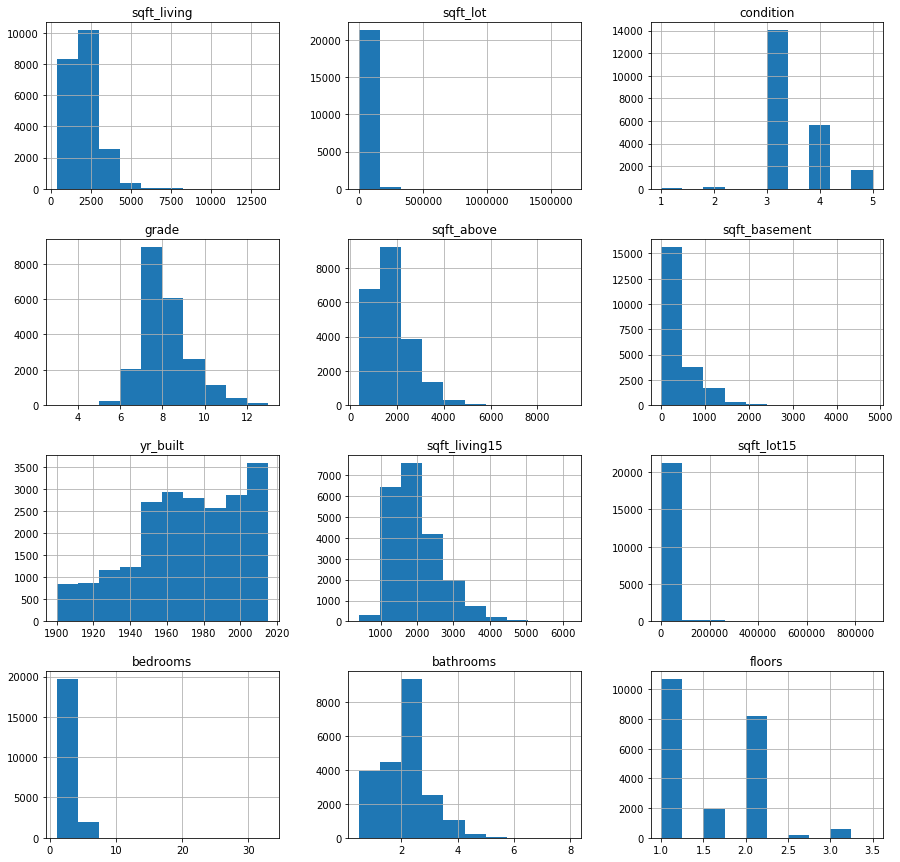

In [135]:
#plt.hist(df[cols])
df[cols].hist(figsize  = [15,15]); 

From what I can observe, squarefoot living, squarefoot lot, sqft above, sqft basement and squarefoot lot 15 probably have very heavy outliers, and could probably also beneficiate from logarythmic normalization.
Bedrooms also probably has an outlier that might be cause by a typo.

### Transformations

In [168]:
df_log=pd.DataFrame()
non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15']
for feat in non_normal:
    df_log[feat] = df[feat].map(lambda x: np.log(x))
df_log = df_log.add_suffix('_log')

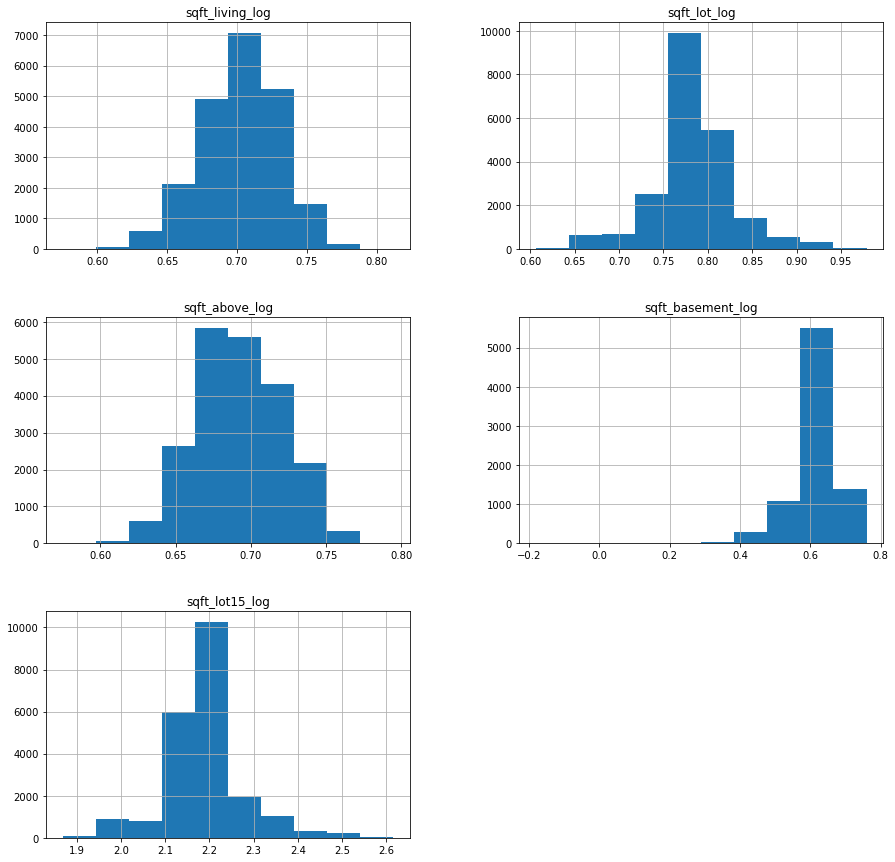

In [169]:
df_log.hist(figsize  = [15,15]); 

The values are a little more normal now. I want to inspect the bedroom variable and then we will move on to scaling.

In [165]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Yes, 33 seems like a typo so we will just remove that.

In [166]:
df.drop(df.loc[df['bedrooms']==33].index, inplace=True)

In [167]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [172]:
norm_cols=['condition', 'grade', 'yr_built', 'sqft_living15', 'bedrooms', 'bathrooms', 'floors']
transf_df=pd.concat([df[norm_cols], df_log])

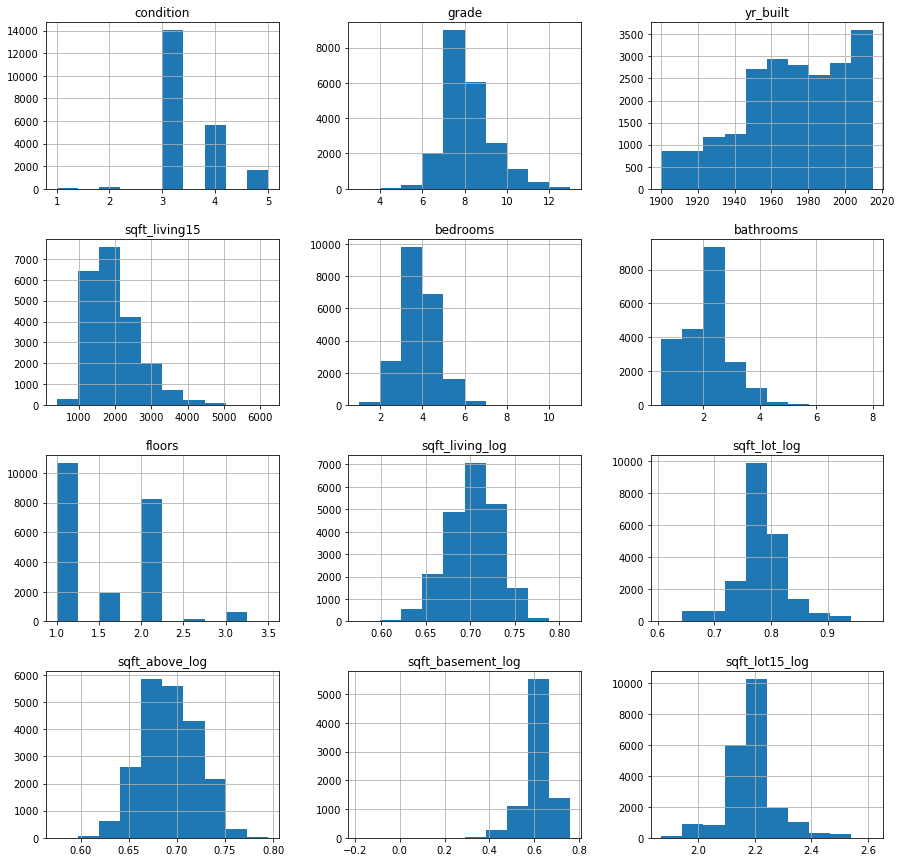

In [174]:
transf_df.hist(figsize=(15,15));

## Now I need to scale.

In [ ]:
Oooo, very nice! While we are here, it is worth mentioning that bathrooms are counted and categorized in quarters as such:

.25 - Containing a sink, but not a toilet, shower, or bath
.5 - Containing a sink and toilet, or a shower or bath
.75 - Containing a sink and toilet, and a shower or bath
1 - Containing a sink, a toilet, a shower, and bath
Source: Illinado Home Solutions, LLC

In [82]:
#This is in scikit learn but I don't like it.
from sklearn.preprocessing import LabelBinarizer
bd_series=df['bedrooms']
bd_grade = bd_series.astype('category')
lb=LabelBinarizer()
bd_encoded=lb.fit_transform(bd_grade)

# You need to convert this back to a dataframe
#new_bd_columns = ohe.get_feature_names(input_features=cat_columns)
bd_dum_df = pd.DataFrame(bd_encoded,columns=(lb.classes_))
bd_dum_df

,1,2,3,4,5,6,7,8,9,10,11,33
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,1,0,0,0,0,0,0,0,0,0
21593,0,0,0,1,0,0,0,0,0,0,0,0
21594,0,1,0,0,0,0,0,0,0,0,0,0
21595,0,0,1,0,0,0,0,0,0,0,0,0
